# Generate Reports

**Goal:**  
Create charts, tables, and Excel reports summarizing the results of:
- Monte Carlo simulation
- Model predictions (PD, LGD, EAD)

**Outputs:**
1. Charts → `reports/figures/`
2. Excel summaries → `reports/outputs/`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set styles
sns.set(style="whitegrid")


In [2]:
# Base project path
project_path = Path("/home/skumar/Desktop/credit-risk-analytics")

# Paths to save figures and Excel reports
figures_path = project_path / "reports/figures"
outputs_path = project_path / "reports/outputs"

# Create folders if they don't exist
figures_path.mkdir(parents=True, exist_ok=True)
outputs_path.mkdir(parents=True, exist_ok=True)

print("✅ Report folders ready")


✅ Report folders ready


## Load Data

- Monte Carlo simulation results
- Model predictions from Step-4


In [3]:
# Load synthetic portfolio
data_file = project_path / "data/input_raw/credit_portfolio.csv"
data = pd.read_csv(data_file)

# For demonstration, use PD, LGD, EAD as predicted values
data["PD_pred"] = data["PD"]
data["LGD_pred"] = data["LGD"]
data["EAD_pred"] = data["EAD"]

# Load Monte Carlo portfolio losses if already computed
# Here we simulate losses for demonstration
n_simulations = 10000
portfolio_losses = []

for i in range(n_simulations):
    random_numbers = np.random.rand(len(data))
    defaults = random_numbers < data["PD_pred"]
    losses = defaults * data["LGD_pred"] * data["EAD_pred"]
    portfolio_losses.append(losses.sum())

portfolio_losses = np.array(portfolio_losses)


## Portfolio Loss Distribution

- Histogram with EL and 95% VaR lines
- Save figure as PNG


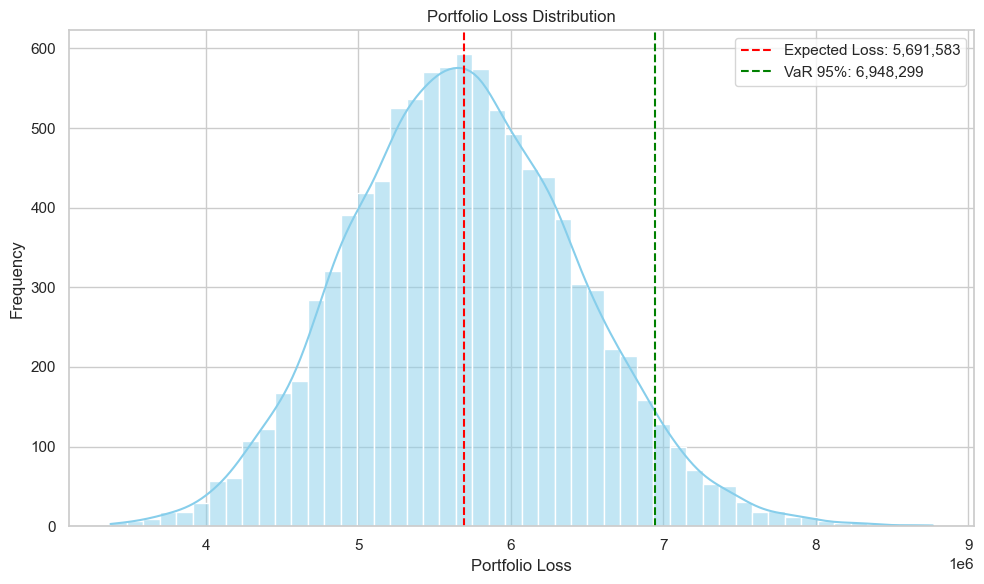

✅ Figure saved at: /home/skumar/Desktop/credit-risk-analytics/reports/figures/portfolio_loss_distribution.png


In [4]:
expected_loss = portfolio_losses.mean()
var_95 = np.percentile(portfolio_losses, 95)

plt.figure(figsize=(10,6))
sns.histplot(portfolio_losses, bins=50, kde=True, color="skyblue")
plt.title("Portfolio Loss Distribution")
plt.xlabel("Portfolio Loss")
plt.ylabel("Frequency")
plt.axvline(expected_loss, color="red", linestyle="--", label=f"Expected Loss: {expected_loss:,.0f}")
plt.axvline(var_95, color="green", linestyle="--", label=f"VaR 95%: {var_95:,.0f}")
plt.legend()
plt.tight_layout()

# Save figure
fig_file = figures_path / "portfolio_loss_distribution.png"
plt.savefig(fig_file)
plt.show()

print(f"✅ Figure saved at: {fig_file}")


## Excel Report

- Summary of portfolio losses
- Summary of model predictions
- Save Excel file to `reports/outputs/`


### Summary

- Portfolio loss distribution chart saved as PNG
- Summary metrics (EL, VaR) and model predictions saved in Excel
- Reports ready to include in GitHub repository or CV
